# Day 5: Visualization

In [ ]:
from pathlib import Path

import pandas as pd

In [72]:
path = Path('data/movielens/')

# reading
movies = pd.read_csv(path / 'movies.csv', index_col='movieId')
links = pd.read_csv(path / 'links.csv', index_col='movieId')
movies = movies.merge(links, how='inner', left_index=True, right_index=True)

# extracting year
pattern = r'\((?P<year>\d+)\)\s?$'
movies['year'] = movies['title'].str.extract(pattern)

# casting
movies['title'] = movies['title'].astype('string')
movies['genres'] = movies['genres'].astype('string')
movies['imdbId'] = movies['imdbId'].astype('int32')
movies['tmdbId'] = movies['tmdbId'].astype('Int32')
movies['year'] = movies['year'].astype('Int32')
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9742 entries, 1 to 193609
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   9742 non-null   string
 1   genres  9742 non-null   string
 2   imdbId  9742 non-null   int32 
 3   tmdbId  9734 non-null   Int32 
 4   year    9729 non-null   Int32 
dtypes: Int32(2), int32(1), string(2)
memory usage: 619.6 KB


## Descriptive Statistic

In [ ]:
movies.describe()

## Time Series

In [ ]:
from pathlib import Path

ratings = pd.read_csv('data/movielens/ratings.csv')
ratings.info() # 2022-04-28

In [ ]:
ratings['parsed_time'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings.info()

### Filters

In [ ]:
ratings['parsed_time'] > '2015-01-01'
ratings['parsed_time'].dt.year == 2017


In [ ]:
# triedenie podla vyparsovaneho datumu a casu
ratings.sort_values(by='parsed_time', ascending=True)

### Task/Lab

1. Zistite, aké bolo priemerné hodnotenie filmu *Titanic* od *James-a Cameroon-a* o rok neskôr po ovedení tohto filmu do kín.

In [ ]:
# titanic od Camerona
is_titanic = movies['title'].str.startswith('Titanic') & (movies['year'] == 1997)

df = movies.loc[ is_titanic ].merge(ratings, how='inner', on='movieId')
df.loc[ df['parsed_time'].dt.year == 1998, 'rating' ].mean()
#.sort_values(by='parsed_time', ascending=True)

In [ ]:
# filter
cameroons_titanic = movies['title'].str.startswith('Titanic') & (movies['year'] == 1997)

# query
titanic_ratings = movies.loc[ cameroons_titanic ].merge(ratings, how='inner', on='movieId')  # .sort_values(by='parsed_time', ascending=True)
titanic_ratings.loc[ titanic_ratings['parsed_time'].dt.year == 1998, 'rating' ].mean()

## Visualization

In [73]:
#creating a DataFrame
import numpy as np
df = pd.DataFrame(np.random.rand(10, 4), 
                  columns=('col_1', 'col_2', 'col_3', 'col_4'))
df

,col_1,col_2,col_3,col_4
0,0.292473,0.635288,0.243184,0.623686
1,0.967723,0.855671,0.952017,0.437658
2,0.597651,0.202224,0.859949,0.311420
3,0.870297,0.240621,0.998018,0.586276
4,0.713202,0.830292,0.657666,0.000198
5,0.871887,0.908788,0.856466,0.802652
6,0.076484,0.263376,0.090891,0.310714
7,0.596126,0.060626,0.011953,0.148333
8,0.341701,0.546308,0.909755,0.183646
9,0.517992,0.230732,0.199547,0.706833


### Line Graph

<AxesSubplot:>

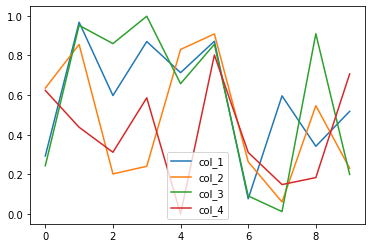

In [74]:
df.plot()

<AxesSubplot:xlabel='col_1'>

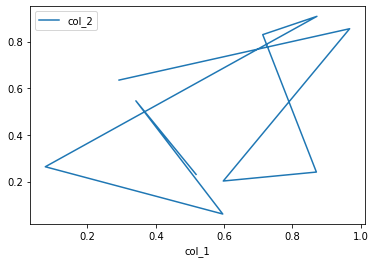

In [75]:
df.plot(x='col_1', y='col_2')

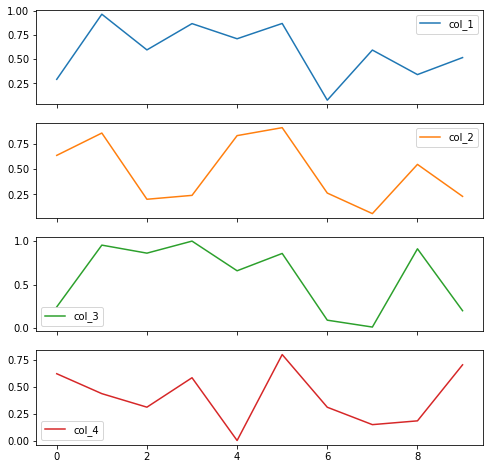

In [76]:
df.plot(subplots=True, figsize=(8, 8));

### Bar Graph

In [ ]:
df.plot(kind="bar")

In [ ]:
df.plot.bar(stacked=True);

In [ ]:
df.plot.barh(stacked=True);

### Box Plot

In [ ]:
df.plot.box()

### Area Plot

In [ ]:
df.plot.area()

## Indiana Jones

|            | Indy 1 | Indy 2 | Indy 3 | Indy 4 |
|------------|--------|--------|--------|--------|
| 2000-01-01 |   5    |   4    |   3    |   1    |
| 2000-01-02 |   4    |   3    |   2    |   2    |

In [104]:
# filters for indiana jones movies
indy1 = movies['title'].str.startswith('Raiders of the Lost Ark') & (movies['year'] == 1981)
indy2 = movies['title'].str.startswith('Indiana Jones and the Temple')
indy3 = movies['title'].str.startswith('Indiana Jones and the Last Crusade')
indy4 = movies['title'].str.startswith('Indiana Jones and the Kingdom')

# append dates only
ratings['date'] = ratings['parsed_time'].dt.date

# all movies
movies.loc[ indy1 | indy2 | indy3 | indy4 ] \
    .merge(ratings, how='inner', on='movieId') \
    .groupby(['date', 'movieId'])['rating'] \
    .mean()

# indy 1
indy1_ratings = movies.loc[ indy1 ] \
    .merge(ratings, how='inner', on='movieId') \
    .groupby('date')['rating'] \
    .mean() \
    .reset_index() \
    .rename(columns={'rating': 'indy1'})

In [105]:
# indy 2
indy2_ratings = movies.loc[ indy2 ] \
    .merge(ratings, how='inner', on='movieId') \
    .groupby('date')['rating'] \
    .mean() \
    .reset_index() \
    .rename(columns={'rating': 'indy2'})

In [120]:
# indy 3
indy3_ratings = movies.loc[ indy3 ] \
    .merge(ratings, how='inner', on='movieId') \
    .groupby('date')['rating'] \
    .mean() \
    .reset_index() \
    .rename(columns={'rating': 'indy3'})

In [123]:
# indy 4
indy4_ratings = movies.loc[ indy4 ] \
    .merge(ratings, how='inner', on='movieId') \
    .groupby('date')['rating'] \
    .mean() \
    .reset_index() \
    .rename(columns={'rating': 'indy4'})

In [125]:
# merge them together
# indy1_ratings.sort_values('date')
# indy2_ratings.sort_values('date')

indy_ratings = indy1_ratings \
    .merge(indy2_ratings, how='outer', on='date') \
    .merge(indy3_ratings, how='outer', on='date') \
    .merge(indy4_ratings, how='outer', on='date')

In [131]:
indy_ratings.sort_values('date', ascending=True)
# indy_ratings.plot(x='date')


,date,indy1,indy2,indy3,indy4
0,1996-12-13,4.0,NaN,NaN,NaN
1,1996-12-26,5.0,NaN,5.0,NaN
2,1997-01-28,5.0,NaN,NaN,NaN
3,1997-02-23,5.0,NaN,NaN,NaN
4,1997-03-19,4.0,NaN,3.0,NaN
...,...,...,...,...,...
193,2018-08-18,4.0,4.0,4.0,NaN
194,2018-08-24,5.0,NaN,NaN,NaN
195,2018-08-28,5.0,NaN,NaN,NaN
196,2018-08-30,3.5,NaN,NaN,NaN


In [156]:
# pridanie date stlpca
ratings['date'] = ratings['parsed_time'].dt.date

In [157]:
# filters
is_indy = movies['title'].str.contains('Indiana Jones')
is_indy1 = movies['title'].str.startswith('Raiders of the Lost Ark') & (movies['year'] == 1981)
is_indy2 = movies['title'].str.startswith('Indiana Jones and the Temple of Doom')
is_indy3 = movies['title'].str.startswith('Indiana Jones and the Last Crusade')
is_indy4 = movies['title'].str.startswith('Indiana Jones and the Kingdom of the Crystal Skull')

In [168]:
# processing indy 1
rating_indy1 = movies.loc[ is_indy1 ] \
    .merge(ratings, how='inner', on='movieId') \
    .loc[:, ['date', 'rating' ]] \
    .groupby('date') \
    .mean() \
    .rename(columns={'rating': 'indy1'})

In [169]:
# processing indy 2
rating_indy2 = movies.loc[ is_indy2 ] \
    .merge(ratings, how='inner', on='movieId') \
    .loc[:, ['date', 'rating' ]] \
    .groupby('date') \
    .mean() \
    .rename(columns={'rating': 'indy2'})

In [170]:
# processing indy 3
rating_indy3 = movies.loc[ is_indy3 ] \
    .merge(ratings, how='inner', on='movieId') \
    .loc[:, ['date', 'rating' ]] \
    .groupby('date') \
    .mean() \
    .rename(columns={'rating': 'indy3'})

In [171]:
# processing indy 4
rating_indy4 = movies.loc[ is_indy4 ] \
    .merge(ratings, how='inner', on='movieId') \
    .loc[:, ['date', 'rating' ]] \
    .groupby('date') \
    .mean() \
    .rename(columns={'rating': 'indy4'})

In [179]:
ratings_indy = rating_indy1 \
    .merge(rating_indy2, how='outer', on='date') \
    .merge(rating_indy3, how='outer', on='date') \
    .merge(rating_indy4, how='outer', on='date')

In [181]:
ratings_indy.sort_values('date', ascending=True)

,indy1,indy2,indy3,indy4
date,,,,
1996-12-13,4.0,NaN,NaN,NaN
1996-12-26,5.0,NaN,5.0,NaN
1997-01-28,5.0,NaN,NaN,NaN
1997-02-23,5.0,NaN,NaN,NaN
1997-03-19,4.0,NaN,3.0,NaN
...,...,...,...,...
2018-08-18,4.0,4.0,4.0,NaN
2018-08-24,5.0,NaN,NaN,NaN
2018-08-28,5.0,NaN,NaN,NaN


In [182]:
ratings_indy.describe()

,indy1,indy2,indy3,indy4
count,197.000000,108.000000,140.000000,38.000000
mean,4.206853,3.638889,4.046429,2.828947
std,0.798223,0.850600,0.781753,1.060828
min,0.500000,1.000000,0.500000,0.500000
25%,4.000000,3.000000,3.875000,2.000000
50%,4.000000,4.000000,4.000000,3.000000
75%,5.000000,4.000000,4.500000,3.500000
max,5.000000,5.000000,5.000000,5.000000


## Visualizing Indiana Jones Ratings

In [208]:
df = ratings_indy.reset_index()
df['date'] = df['date'].astype('datetime64')

In [214]:
df = df.loc[ df['date'].dt.year == 2015 ]
df

,date,indy1,indy2,indy3,indy4
135,2015-01-16,1.0,NaN,0.5,NaN
136,2015-01-30,2.5,NaN,NaN,NaN
137,2015-04-09,3.5,NaN,NaN,NaN
138,2015-04-15,4.0,NaN,NaN,NaN
139,2015-05-01,5.0,NaN,5.0,2.0
140,2015-05-18,3.5,NaN,4.0,2.5
141,2015-05-31,4.0,NaN,4.0,NaN
142,2015-06-28,3.5,NaN,3.0,NaN
143,2015-07-02,2.0,NaN,NaN,NaN
144,2015-07-04,4.0,3.0,NaN,NaN


<AxesSubplot:xlabel='date'>

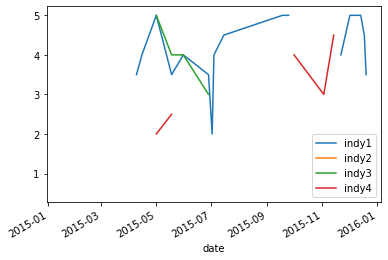

In [213]:
df.plot(x='date')

<AxesSubplot:xlabel='date'>

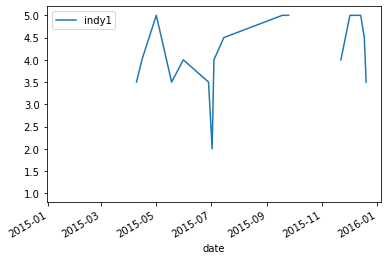

In [239]:
df.plot(x='date', y='indy1')

array([<AxesSubplot:xlabel='date'>], dtype=object)

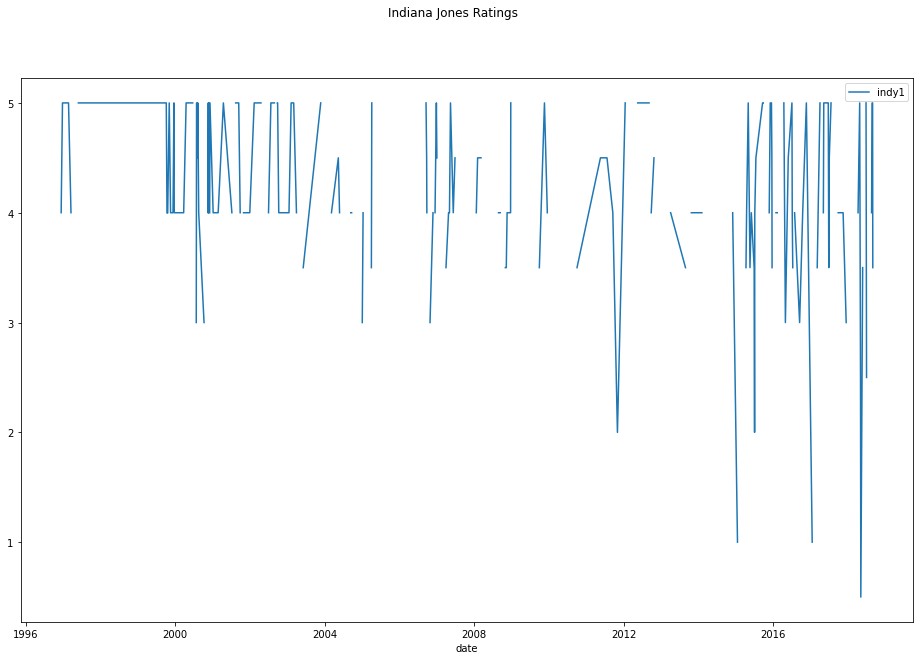

In [203]:
df.plot(subplots=True, x='date', y='indy1', figsize=(16,10), title='Indiana Jones Ratings')

<AxesSubplot:xlabel='date', ylabel='indy1'>

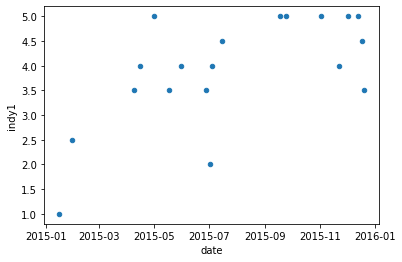

In [233]:
df.plot(kind="scatter", x='date', y='indy1')

<AxesSubplot:xlabel='date'>

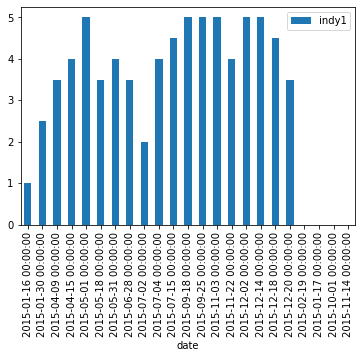

In [234]:
df.plot(kind='bar', x='date', y='indy1')

<AxesSubplot:xlabel='date'>

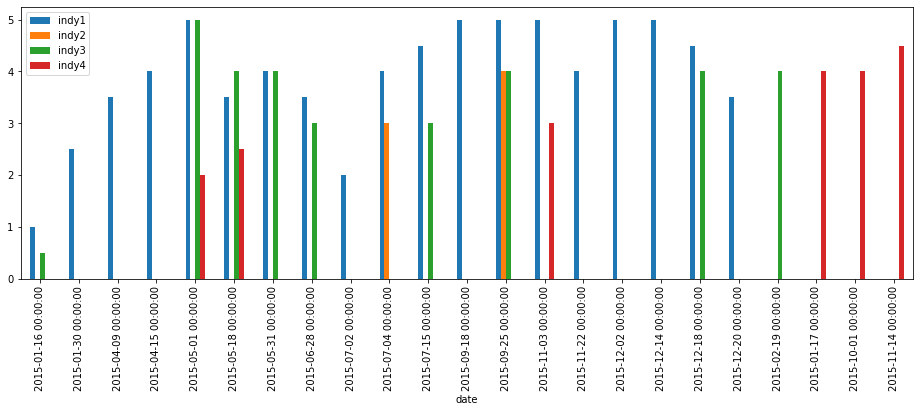

In [236]:
df.plot(kind='bar', x='date', figsize=(16,5))

<AxesSubplot:xlabel='date'>

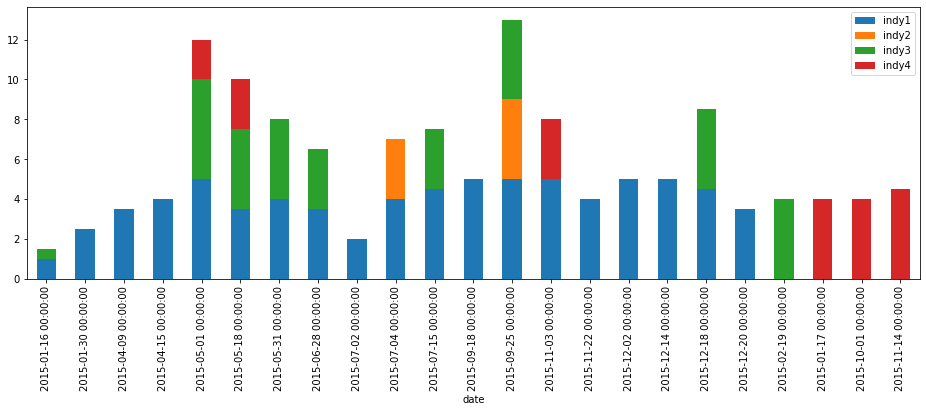

In [237]:
df.plot(kind='bar', x='date', figsize=(16,5), stacked=True)

<AxesSubplot:>

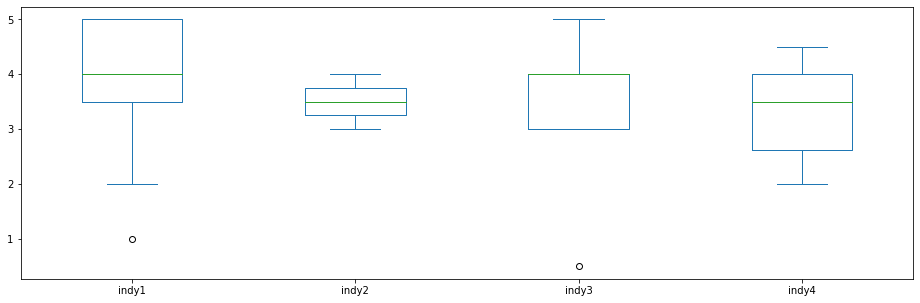

In [240]:
df.plot(kind='box', x='date', figsize=(16,5))

<AxesSubplot:xlabel='date'>

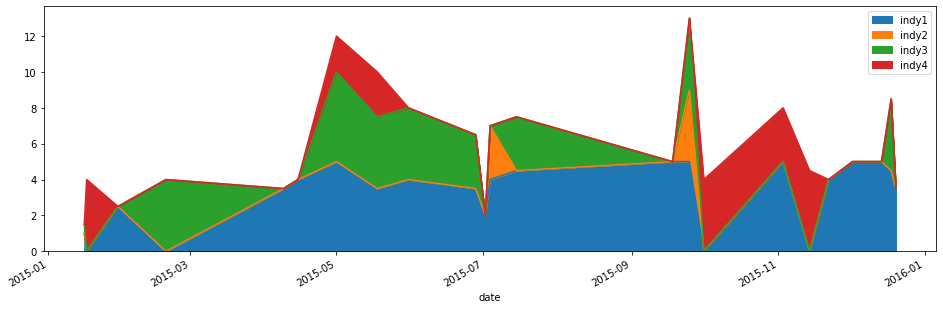

In [241]:
df.plot(kind='area', x='date', figsize=(16,5))

<AxesSubplot:ylabel='indy1'>

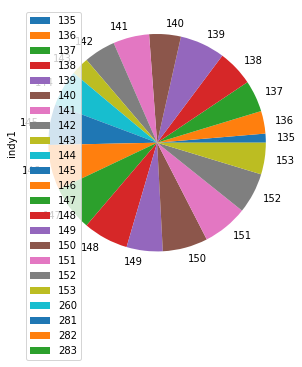

In [243]:
df.plot(kind='pie', x='date', y='indy1', figsize=(16,5))

## Funkcia `df.fillna()`

In [224]:
data = pd.Series([None, 2, None, 4, None])

In [225]:
data.fillna(99)

0    99.0
1     2.0
2    99.0
3     4.0
4    99.0
dtype: float64

In [226]:
data.fillna(method='ffill')

0    NaN
1    2.0
2    2.0
3    4.0
4    4.0
dtype: float64

In [227]:
data.fillna(method='backfill')

0    2.0
1    2.0
2    4.0
3    4.0
4    NaN
dtype: float64

In [228]:
data.interpolate()

0    NaN
1    2.0
2    3.0
3    4.0
4    4.0
dtype: float64

## How to Pandas and SQL

In [244]:
# import single table
query = 'Album'
conn = 'sqlite:///data/chinook.sqlite'

df = pd.read_sql(query, conn)

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   AlbumId   347 non-null    int64 
 1   Title     347 non-null    object
 2   ArtistId  347 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.3+ KB


In [246]:
df

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
...,...,...,...
342,343,Respighi:Pines of Rome,226
343,344,Schubert: The Late String Quartets & String Qu...,272
344,345,Monteverdi: L'Orfeo,273
345,346,Mozart: Chamber Music,274


In [249]:
# import result of a select statement
query = 'select al.albumid, al.title, at.name from album al inner join artist at on al.artistid=at.artistid;'
conn = 'sqlite:///data/chinook.sqlite'

df = pd.read_sql(query, conn)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   AlbumId  347 non-null    int64 
 1   Title    347 non-null    object
 2   Name     347 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.3+ KB


In [255]:
# export as sql
# df.drop([0, 1, 2])

conn = 'sqlite:///data/albums.sqlite'
table = 'album'

df.to_sql(table, conn)

ValueError: Table 'album' already exists.